In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.19.0


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Class labels
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

# Print dataset shape
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


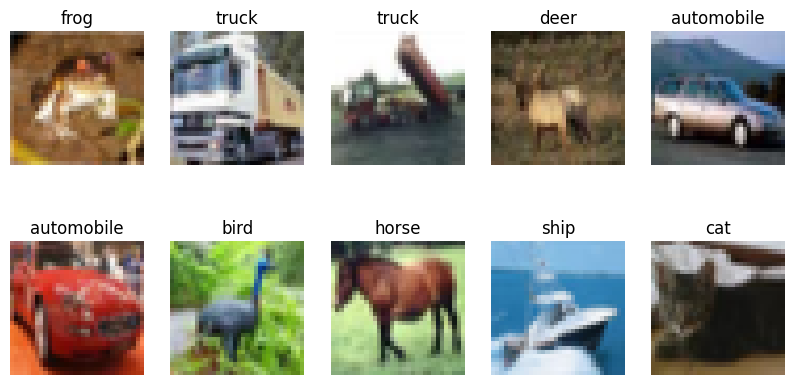

In [7]:
# Display sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")

plt.show()


In [8]:
# Normalize the images to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0


In [9]:
from tensorflow.keras import layers, models

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Print model summary
model.summary()


C:\Users\DELL 4\anaconda3\envs\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test), batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 61ms/step - accuracy: 0.3368 - loss: 1.7922 - val_accuracy: 0.5432 - val_loss: 1.2639
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5771 - loss: 1.1860 - val_accuracy: 0.6185 - val_loss: 1.0885
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.6454 - loss: 1.0063 - val_accuracy: 0.6729 - val_loss: 0.9329
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.6980 - loss: 0.8692 - val_accuracy: 0.6963 - val_loss: 0.8747
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.7273 - loss: 0.7826 - val_accuracy: 0.6989 - val_loss: 0.8666
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.7504 - loss: 0.7044 - val_accuracy: 0.7028 - val_loss: 0.8761
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.7755 - loss: 0.6375 - val_accuracy: 0.7188 - val_loss: 0.8254
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.8007 - loss: 0.5682 - 